# [Deliverable #2] Scrape and Analyse Mars Weather Data
---
## Step #0 - Import Dependencies and Setup
---

In [1]:
# Import Splinter and BeautifulSoup Libraries (For Automated Web Browsing and Scraping)
# Import Pandas and Matplotlib Libraries (For Data Structuring & Visualisation)
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set up Splinter (Google Chrome Browser)
browser = Browser('chrome')

## Step #1 - Visit Website (Splinter Automated Browsing)
---

In [3]:
# Visit the Mars Weather Data Site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)

In [4]:
# Parse the website
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

## Step #2 - Scrape Website Using BeautifulSoup (Extract Table)
---

In [5]:
# From inspecting the website, the table is found in a table tag w/ class as 'table'
table = soup.find('table', class_ = 'table')

## Step #3 - Assemble Scraped Table Data to Pandas DataFrame (`weather_df`)
---

In [6]:
# Get the first 'tr' row which contains the column headers of the table
row_header = table.find('tr')

# For every header (in 'th' tag) in the row header, extract the header as text and store in a new list
column_headers = [header.text.strip() for header in row_header.find_all('th')]

# Log the list of column headers
column_headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Define new list to store dictionaries of scraped data from the table
weather_data_list = []

# Scrape all data rows from the table; first row skipped (header row)
weather_data_rows = table.find_all('tr')[1:]

# For every data row in the table...
# Store the data values from each column of the row as text in a list
# Zip the column headers and data values together and store as dictionary
# Append the main list with the new dictionary
for row in weather_data_rows:
    data_row = [td.text.strip() for td in row.find_all('td')]
    temp_dict = dict(zip(column_headers, data_row))
    weather_data_list.append(temp_dict)

# Pass the final list of Mars Weather Data to a new Pandas DataFrame
weather_df = pd.DataFrame(weather_data_list)

# Display the Mars Weather DataFrame
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


## Step #4 - Examine Data Types in Mars Weather DataFrame (`weather_df`) & Convert
---

In [8]:
# Log the list of data types in the DataFrame (Before Conversion)
print(weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [9]:
# Convert date column to 'datetime' data type
weather_df["terrestrial_date"] = pd.to_datetime(weather_df["terrestrial_date"])

# Batch convert terrestrial days, longitude and month columns to Integer
weather_df = weather_df.astype({"sol":"int64", "ls":"int64", "month":"int64"})

# Batch convert min temperature and pressure columns to Float
weather_df = weather_df.astype({"min_temp":"float64", "pressure":"float64"})

# Log the list of data types in the DataFrame (After Conversion)
print(weather_df.dtypes)
print()

# Display the Mars Weather DataFrame (After Conversion)
weather_df

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object



,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


## Step #5 - Analyse Weather Dataset (`weather_df`) Using Pandas & Matplotlib
---

### Q1: How Many Months Exist on Mars?

In [10]:
# Return Pandas Series of count for each unique value from the 'Month' column
month_mars = weather_df["month"].value_counts()

# Pass through Pandas Series where the index is the Month Number (Sorted)
month_df = pd.DataFrame({"Count": month_mars.values}, index = month_mars.index)
month_df = month_df.sort_index()


# Display DataFrame of Unique Month Count
month_df

,Count
month,
1,174
2,178
3,192
4,194
5,149
6,147
7,142
8,141
9,134


### Q2: How Many Martian Days in the Scraped Dataset Exist?

In [11]:
# Return the length of the Mars Weather DataFrame
total_martian_days = len(weather_df)

# Log the Number of Martian Days
print(f"There are {total_martian_days} Martian Days in the Scraped Dataset.")

There are 1867 Martian Days in the Scraped Dataset.


### Q3: What are the Coldest and the Warmest Months on Mars (at the Location of Curiosity)?

In [12]:
# Function to draw bar plot when using Panda Series (min_temp grouped by month)
def mars_temp_bar_plot (temp_series) : 

    # Using the Matplotlib library (plt), generate a bar plot
    plt_bar = plt.bar(temp_series.index.astype(str),
                       temp_series.values,
                       color = "royalblue",
                       width = 0.5)

    # In the plot, set a new title where Font Size is 15
    plt.title(f"Average Daily Temperature on Mars (All Months)", fontsize = 14)

    # In the plot, set a new label for the 'x' axis where Font Size is 14
    plt.xlabel("Date", fontsize = 14)

    # In the plot, set a new label for the 'y' axis where Font Size is 14
    plt.ylabel("Temperature (C)", fontsize = 14)

    # In the plot, adjust font size for the 'x' ticks to 11
    plt.xticks(fontsize = 11)

    # In the plot, update the 'y' axis range as: -85 to 0
    plt.ylim(-85, 0)

    # In the plot, adjust 'y' tick Font size to 11
    plt.yticks(fontsize = 11)


    # Set the background color of the plot (within the axes) to Black
    plt.gca().set_facecolor("black")

    # Add grid lines (faint) to the plot
    plt.grid(alpha = 0.2)


    # Display the Plot (Using Matplotlib)
    plt.show()

In [13]:
# Group 'Minimum Temperature' by 'Month' and calculate the mean of 'Minimum Temperature'
avg_temp_month = weather_df.groupby(["month"])["min_temp"].mean()

# Display the Pandas Series
avg_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

The Coldest Month on Mars: 3
The Hottest Month on Mars: 8



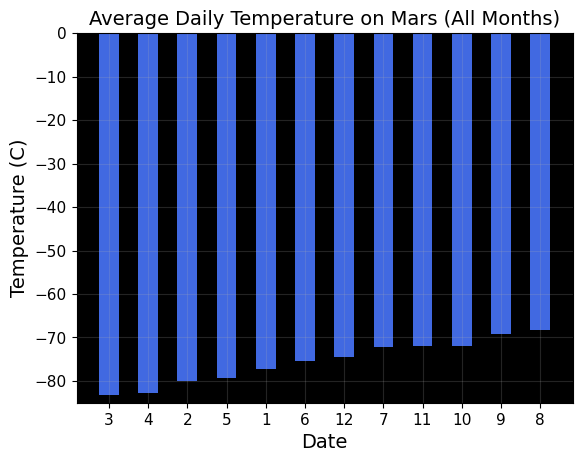

In [14]:
# Return the same Pandas Series, but Sorted in Ascending Order
sorted_avg_temp_month = avg_temp_month.sort_values(ascending = True)

# Get the months with the minimum and maximum average temperature 
month_temp_max = sorted_avg_temp_month.idxmax()
month_temp_min = sorted_avg_temp_month.idxmin()

# Log the months with min and max temperature
print(f"The Coldest Month on Mars: {month_temp_min}")
print(f"The Hottest Month on Mars: {month_temp_max}")

print()

# Use the defined function to generate the Bar Plot (Average Minimum Temperature)
mars_temp_bar_plot(sorted_avg_temp_month)

### Q4: Which Months Have the Lowest and the Highest Atmospheric Pressure on Mars? 

In [15]:
# Function to draw bar plot when using Panda Series (pressure grouped by month)
def mars_pressure_bar_plot (pressure_series) : 

    # Using the Matplotlib library (plt), generate a bar plot
    plt_bar = plt.bar(pressure_series.index.astype(str),
                       pressure_series.values,
                       color = "tomato",
                       width = 0.5)

    # In the plot, set a new title where Font Size is 14
    plt.title(f"Average Daily Atmospheric Pressure on Mars (All Months)", fontsize = 14)

    # In the plot, set a new label for the 'x' axis where Font Size is 14
    plt.xlabel("Month", fontsize = 14)

    # In the plot, set a new label for the 'y' axis where Font Size is 14
    plt.ylabel("Atmospheric Pressure", fontsize = 14)

    # In the plot, adjust font size for the 'x' ticks to 11
    plt.xticks(fontsize = 11)

    # In the plot, update the 'y' axis range as: 0 to 1000
    plt.ylim(0, 1000)

    # In the plot, adjust 'y' tick Font size to 11
    plt.yticks(fontsize = 11)


    # Set the background color of the plot (within the axes) to Black
    plt.gca().set_facecolor("black")

    # Add grid lines (faint) to the plot
    plt.grid(alpha = 0.2)


    # Display the Plot (Using Matplotlib)
    plt.show()

In [16]:
# Group 'Pressure' by 'Month' and calculate the mean of 'Pressure'
avg_pressure_month = weather_df.groupby(["month"])["pressure"].mean()

# Display the Pandas Series
avg_pressure_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Month with Lowest Atmospheric Pressure on Mars: 6
Month with Highest Atmospheric Pressure on Mars: 9



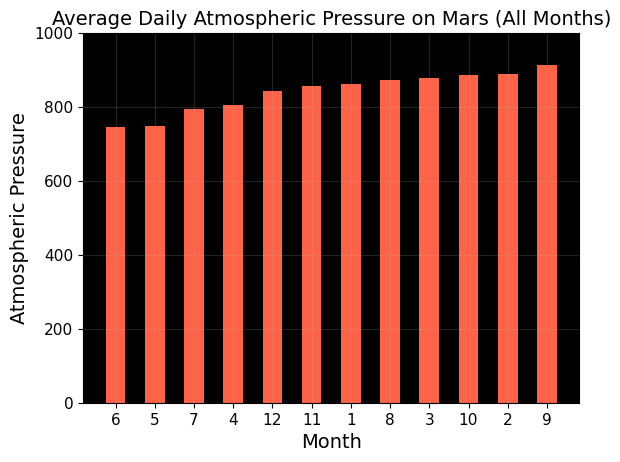

In [17]:
# Return the same Pandas Series, but Sorted in Ascending Order
sorted_avg_pressure_month = avg_pressure_month.sort_values(ascending = True)

# Get the months with the minimum and maximum average atmospheric pressure
month_pressure_max = sorted_avg_pressure_month.idxmax()
month_pressure_min = sorted_avg_pressure_month.idxmin()

# Log the months with min and max atmospheric pressure
print(f"Month with Lowest Atmospheric Pressure on Mars: {month_pressure_min}")
print(f"Month with Highest Atmospheric Pressure on Mars: {month_pressure_max}")

print()

# Use the defined function to generate the Bar Plot (Average Pressure)
mars_pressure_bar_plot(sorted_avg_pressure_month)

### Q5: About How Many Terrestrial (Earth) Days Exist in a Martian Year?

In [18]:
# Function to draw bar plot when using Panda Series (sol and min_temp columns)
def mars_sol_temp_plot (sol_temp_df) : 

    # Using the Matplotlib library (plt), generate a plot
    plt_plot = plt.plot(sol_temp_df["sol"],
                       sol_temp_df["min_temp"],
                       color = "gold")

    # In the plot, set a new title where Font Size is 14
    plt.title(f"Daily Minimum Temperature on Mars", fontsize = 14)

    # In the plot, set a new label for the 'x' axis where Font Size is 14
    plt.xlabel("No. Terrestrial (Earth) Days", fontsize = 14)

    # In the plot, set a new label for the 'y' axis where Font Size is 14
    plt.ylabel("Temperature (C)", fontsize = 14)

    # In the plot, adjust font size for the 'x' ticks to 11
    plt.xticks(fontsize = 11)

    # In the plot, update the 'y' axis range as: -90 to -60
    #plt.ylim(-90, -60)

    # In the plot, adjust 'y' tick Font size to 11
    plt.yticks(fontsize = 11)


    # Set the background color of the plot (within the axes) to Black
    plt.gca().set_facecolor("black")

    # Add grid lines (faint) to the plot
    plt.grid(alpha = 0.2)


    # Display the Plot (Using Matplotlib)
    plt.show()

According to JPL NASA, one year in Mars is equivalent to 687 terrestrial (Earth) days.
Source: https://www.jpl.nasa.gov/edu/learn/video/mars-in-a-minute-how-long-is-a-year-on-mars/

The trend in the plot implies as Mars gets closer to the Sun during its orbital cycle, the temperature increases.
Going by the plot, the distance from peak-to-peak is roughly 700 days (1500 - 800).



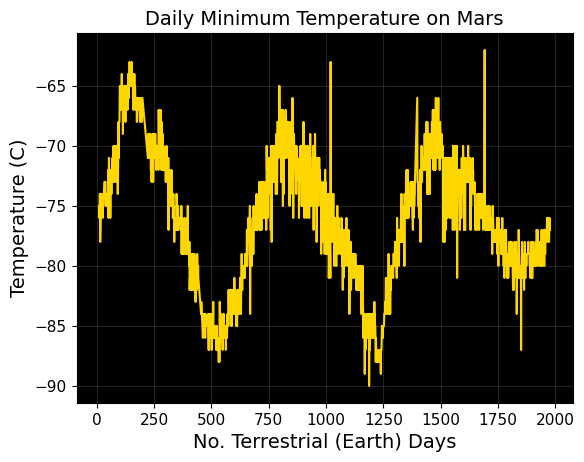

In [19]:
# Log my findings from the internet per the analysis question
print(f"According to JPL NASA, one year in Mars is equivalent to 687 terrestrial (Earth) days.")
print(f"Source: https://www.jpl.nasa.gov/edu/learn/video/mars-in-a-minute-how-long-is-a-year-on-mars/")

print()

# Log my observations of the generated plot
print(f"The trend in the plot implies as Mars gets closer to the Sun during its orbital cycle, the temperature increases.")
print(f"Going by the plot, the distance from peak-to-peak is roughly 700 days (1500 - 800).")

print()

# Use the defined function to generate the Plot (Daily Minimum Temperature)
mars_sol_temp_plot(weather_df)

## Step #6 - Export Mars Weather DataFrame (`weather_df`) to CSV
---

In [20]:
# Using the Pandas Module, import the Mars Weather DataFrame to a CSV file
weather_df.to_csv(r'Data/mars_weather.csv', index = False)

# Inform user the CSV file is created and stored
print("******Mars Weather Data Saved to CSV File (Data/mars_weather.csv)******")

******Mars Weather Data Saved to CSV File (Data/mars_weather.csv)******


### Terminate Browsing Session

In [21]:
browser.quit()